In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

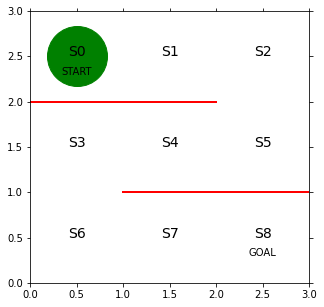

In [3]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 2], [1, 1], color='red', linewidth=2)
plt.plot([0, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)


# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [4]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, np.nan, np.nan],  # s0
                    [np.nan, 1, np.nan, np.nan],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [np.nan, 1, 1, np.nan],  # s3
                    [np.nan, 1, np.nan, 1],  # s4
                    [1, np.nan, np.nan, 1],  # s5
                    [1, 1, np.nan, np.nan],  # s6
                    [np.nan, 1, np.nan, 1],  # s7、※s8はゴールなので、方策はなし
                    ])

In [5]:
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i,:] = theta[i,:]/np.nansum(theta[i,:])
    
    pi = np.nan_to_num(pi) # nanを0に変換する
    return pi
pi_0 = simple_convert_into_pi_from_theta(theta_0)

[0. 0. 0. 0.] [nan  1. nan nan]
[0. 0. 0. 0.] [nan  1. nan nan]
[0. 0. 0. 0.] [nan nan  1.  1.]
[0. 0. 0. 0.] [nan  1.  1. nan]
[0. 0. 0. 0.] [nan  1. nan  1.]
[0. 0. 0. 0.] [ 1. nan nan  1.]
[0. 0. 0. 0.] [ 1.  1. nan nan]
[0. 0. 0. 0.] [nan  1. nan  1.]
[[nan 1.  nan nan]
 [nan 1.  nan nan]
 [nan nan 0.5 0.5]
 [nan 0.5 0.5 nan]
 [nan 0.5 nan 0.5]
 [0.5 nan nan 0.5]
 [0.5 0.5 nan nan]
 [nan 0.5 nan 0.5]]
[[0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5]
 [0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.5]]


array([[0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [0. , 0.5, 0.5, 0. ],
       [0. , 0.5, 0. , 0.5],
       [0.5, 0. , 0. , 0.5],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5]])

In [8]:
# 初期の行動価値関数Qを設定

[a,b] = theta_0.shape # 行と列の値をa,bに格納(常に一緒では？)
step = np.random.rand(a,b)
Q = step*theta_0
# * theta0をすることで要素ごとに掛け算をし、Qの壁方向の値がnanになる

[[0.57118738 0.23780847 0.12055608 0.91020442]
 [0.28322354 0.91252801 0.67959533 0.2479199 ]
 [0.03857136 0.93143869 0.54005006 0.00552187]
 [0.23498556 0.30364435 0.44022774 0.30824829]
 [0.36842011 0.06839797 0.61621766 0.86492777]
 [0.36584573 0.22690341 0.62012196 0.02382184]
 [0.33666833 0.55141581 0.5517336  0.12129889]
 [0.77771611 0.42323737 0.33455137 0.05798625]]
[[       nan 0.23780847        nan        nan]
 [       nan 0.91252801        nan        nan]
 [       nan        nan 0.54005006 0.00552187]
 [       nan 0.30364435 0.44022774        nan]
 [       nan 0.06839797        nan 0.86492777]
 [0.36584573        nan        nan 0.02382184]
 [0.33666833 0.55141581        nan        nan]
 [       nan 0.42323737        nan 0.05798625]]


In [9]:
# ε-greedy法を実装
def get_action(s,Q,epsilon,pi_0):
    direction = ["up", "right", "down", "left"]
    # 行動を決める
    if np.random.rand() < epsilon:
        # εの確率でランダムに動かす
        next_direction = np.random.choice(direction,p=pi_0[s,:])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s,:])]
        # 行動をindexに
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

# 実際の行動を出力するやつ
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 行動aの方向

    # 行動から次の状態を決める
    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next

In [10]:
# Sarsaによる行動価値関数Qの更新


def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

    if s_next == 8:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q


In [11]:
def goal_maze_re_s_a_Q(Q,epsilon,eta,gamma,pi):
    s = 0 # スタート地点
    # sは現在地、piは現在の方策
    a = a_next = get_action(s,Q,epsilon,pi)
    s_a_history = [[0,np.nan]]
    while(1):
        a = a_next # 行動更新
        s_a_history[-1][1] = a
        # 現在の状態を記録 => [-1]なのは現在の一番最後に記録したいから
        s_next = get_s_next(s,a,Q,epsilon,pi)
        # 次の状態を格納
        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく
        # s_a_historyは第一引数に一個前の状態、第二引数に現在の状態が入っている

        # 報酬を与え、次の行動を決める
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next,Q,epsilon,pi)
        
        # 価値関数を更新
        Q = Sarsa(s,a,r,s_next,a_next,Q,eta,gamma)

        # 終了判定
        if s_next == 8:  # ゴール地点なら終了
            break
        else:
            s = s_next
    return [s_a_history, Q]


In [13]:
# Sarsaで解く
eta = 0.1 # 学習率
gamma = 0.9 # 時間割引率
epsilon = 0.5 # ε-greedy法の初期値
v = np.nanmax(Q,axis=1)
is_continue = True
episode = 1

while is_continue:
    print("エピソード:" + str(episode))

    # ε-geedyの値を徐々に小さくする
    epsilon = epsilon/2

    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history,Q] = goal_maze_re_s_a_Q(Q,epsilon,eta,gamma,pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q,axis=1) # 状態ごとの価値の最大値を求める
    # 状態価値の変化を出力
    print(np.sum(abs(new_v-v)))
    v = new_v

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    # 100回繰り返す
    episode = episode+1
    if episode > 100:
        break


エピソード:1
0.13250748484514235
迷路を解くのにかかったステップ数は14です
エピソード:2
0.024060950807130665
迷路を解くのにかかったステップ数は8です
エピソード:3
0.019607014783200094
迷路を解くのにかかったステップ数は8です
エピソード:4
0.01594910540524197
迷路を解くのにかかったステップ数は8です
エピソード:5
0.013005564177093587
迷路を解くのにかかったステップ数は8です
エピソード:6
0.011035214095015844
迷路を解くのにかかったステップ数は8です
エピソード:7
0.009385647894662008
迷路を解くのにかかったステップ数は8です
エピソード:8
0.00800544443400275
迷路を解くのにかかったステップ数は8です
エピソード:9
0.006851185702370921
迷路を解くのにかかったステップ数は8です
エピソード:10
0.005886264612629255
迷路を解くのにかかったステップ数は8です
エピソード:11
0.00555529375893038
迷路を解くのにかかったステップ数は8です
エピソード:12
0.005427563959756021
迷路を解くのにかかったステップ数は8です
エピソード:13
0.005298516041949919
迷路を解くのにかかったステップ数は8です
エピソード:14
0.005169307982911098
迷路を解くのにかかったステップ数は8です
エピソード:15
0.005040794186357445
迷路を解くのにかかったステップ数は8です
エピソード:16
0.00491359360156407
迷路を解くのにかかったステップ数は8です
エピソード:17
0.004788143436555314
迷路を解くのにかかったステップ数は8です
エピソード:18
0.004664741432013508
迷路を解くのにかかったステップ数は8です
エピソード:19
0.004543579068355397
迷路を解くのにかかったステップ数は8です
エピソード:20
0.004424767598690704
迷路を解くのにかかったステッ